# Chicago Traffic Crash Analysis

## Overview
This project analyzes traffic crash data from Chicago's Open Data Portal to identify patterns and factors contributing to fatal and serious vehicle crashes. By leveraging datasets on crash incidents, involving people, and vehicles, the analysis provides actionable insights into high-risk conditions and behaviors. The results aim to inform public safety initiatives and reduce traffic incidents through data-driven decisions.


<img src="./images/chicago_header_image.jpg" width="1280" height="640">

*Photo by [Sawyer Bengtson](https://unsplash.com/@sawyerbengtson) on Unsplash*
___

## Table of Contents

### 1. [Business Understanding](#Business-Understanding)
* 1.1 [Background](#Background)
* 1.2 [Goals](#Goals)
* 1.3 [Success Criteria](#Success-Criteria)
   
### 2. [Data Understanding](#Data-Understanding)


### 3. [Data Preparation](#Data-Preparation)

### 4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)


### 5. [Modeling](#Modeling)


### 6. [Evaluation](#Evaluation)

### 7. [Conclusion](#Conclusion)
* 7.1 [Limitations](#Limitations)
* 7.2 [Recommendations](#Recommendations)
* 7.3 [Next Steps](#Next-Steps)

### 8. [References](#References)

## 1. <a name ="Business-Understanding"></a> Business Understanding

### 1.1 <a name ="Background"></a> Background 

In 2023, Chicago recorded 136 traffic deaths ([CDOT, 2024](https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B60FB7292-0000-CB1B-AC4D-334F5F94606B%7D)), a sobering reminder of the persistent challenges the city faces in ensuring road safety. Despite efforts from various cities across the U.S., traffic fatalities continue to be a major issue. In response, Chicago introduced its [Vision Zero](https://visionzeronetwork.org/about/what-is-vision-zero/) Action Plan in June 2017, committing to the shared goal of eliminating traffic fatalities and serious injuries on the city’s streets by 2026 ([Vision Zero Chicago Action Plan, 2017](https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B0031C690-0000-C016-92E9-31618D7320B1%7D)).

Traffic safety is not only a public health issue but also an equity concern, as Black and Brown communities, particularly in cities like Chicago and Philadelphia, suffer disproportionately from traffic fatalities.  In Philadelphia, zip codes with higher poverty rates see more crash hospitalizations ([City of Philadelphia, 2024](https://visionzerophl.com/plans-and-reports/annual-report-2024/)). These communities often face underinvestment in infrastructure, compounding the challenges they face in reducing fatalities and injuries.

Experts agree traffic fatalities are preventable. The Vision Zero Chicago Action Plan emphasizes that crashes are “predictable and preventable” events, with speed being a leading factor in severe accidents ([Vision Zero Chicago Action Plan, 2017](https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B0031C690-0000-C016-92E9-31618D7320B1%7D)). Reducing speed is critical but requires addressing driver behavior through strategies like speed cushions, narrower lanes, and lower speed limits—though their effectiveness is debated.

Through my involvement with the City of Philadelphia’s Vision Zero Ambassadors program, I gained valuable experience engaging underserved communities, raising awareness, and understanding the importance of data-driven interventions to reduce fatalities.

### 1.2 <a name ="Goals"></a> Goals

The goal of this project is to use crash data from CDOT's Open Data Portal to develop a model that predicts whether a crash resulted in serious injuries. For the purposes of this project, ‘serious’ injuries refer to both fatalities and ‘incapacitating’ injuries. CDOT defines incapacitating injuries as: *'injuries that prevent an individual from walking, driving, or performing normal activities'*.

With the focus on using the model's predictions to identify contributing factors in serious crashes, this project is inherently attempting to verify CDOT’s claim that speed is a key factor in the severity of crashes, as outlined in their [2024 Annual Traffic Report](https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B60FB7292-0000-CB1B-AC4D-334F5F94606B%7D). By analyzing speed alongside other factors such as road conditions, road design, enforcement, and vehicle type and size, the model will provide valuable insights into how these elements contribute to traffic fatalities and serious injuries.

The model will be designed to be easily interpretable, meaning it will provide clear and understandable explanations for how it arrives at its predictions. This is crucial for decision-makers, as it allows them to trust the model’s results and use it to guide traffic safety policies and resource allocation. An easily interpretable model will help agencies like CDOT and the Chicago Metropolitan Agency for Planning (CMAP) target resources more effectively, allow policymakers to evaluate the impact of different safety strategies, and help make informed decisions about where to focus their efforts. Ultimately, this model will assist in making data-driven decisions that reduce fatalities and improve the overall safety of Chicago’s roadways.

### 1.3 <a name ="Success-Criteria"></a> Success Criteria

The success of this project will be determined by how easily the model can explain its predictions and which features are driving the outcomes. Although the focus is on model interpretability, measuring the model’s ability to accurately predict whether a crash resulted in serious or fatal injuries is also a key success criterion, as it provides information about how confident we can be about the results. Since this will be treated as a classification problem (i.e., classifying a crash to have fatal/serious injuries or not), classification metrics that I will measure are accuracy, precision, recall, and F1.


The model will be considered successful if it achieves moderate accuracy (e.g., between 65% and 80%) and provides clear, actionable insights that guide traffic safety policies and resource allocation. This moderate accuracy ensures that the insights gained from the model are trustworthy enough for stakeholders to implement targeted interventions effectively.

## 2. <a name ="Data-Understanding"></a> Data Understanding

The data for this project came from the city of [Chicago's Data Portal](https://data.cityofchicago.org/). The datasets involved are updated regularly, with the most recent update on Dec 12, 2024, and the earliest recorded data dating back to March 2023. More on each dataset:
1. [Traffic Crashes - Crashes](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if/about_data): Contains detailed information about each traffic crash that occurred within the City of Chicago.
    * Total of **901k** observations with **48** features.
        * Includes fields such as crash date, crash location, weather conditions, road conditions, and contributing factors like speed limits.
    * Unique identifier for each crash is the `CRASH_RECORD_ID`.
    * Target class: `MOST_SEVERE_INJURY`
        * Includes 5 classes: 
             * *NO INDICATION OF INJURY*
             * *NONINCAPACITATING INJURY*
             * *REPORTED, NOT EVIDENT*
             * *INCAPACITATING INJURY*
             * *FATAL*
<br><br>

2. [Traffic Crashes - People](https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d/about_data): Provides information about individuals involved in a traffic crash, including details about their injuries 
    * Total of **1.98M** observations with **29** features.
        * Each record corresponds to an occupant in a vehicle listed in the Crash dataset, and it includes data such as the type of injury, role (driver, passenger, pedestrian, etc.), and whether the individual sustained any injuries.
    * Links to `Crash` dataset using the `CRASH_RECORD_ID` and `Vehicles` using `VEHICLE_ID`. 
    * Unique identifier for each person: `PERSON_ID` 
<br><br>

3. [Traffic Crashes - Vehicles](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/about_data): Contains information about the vehicle(s) involved in traffic crashes. 
   
    * Total of **1.84M** observations with **71** features.
        * Each “unit” involved in a crash (e.g., motor vehicles, bicycles, pedestrians) is assigned a record. 
        * Information about the vehicle type, damage, and trajectory, as well as the relationship with the individuals involved (drivers, passengers, pedestrians).
        
    * Links to the `Crash` and `People` datasets using the `CRASH_RECORD_ID`. 
    
    


### 2.1 Reproducibility

#### 2.1.1 Importing Necessary Libraries

In [1]:
# for getting data
import os
import zipfile
import os
import zipfile
import json
from pathlib import Path

# for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# for modeling

#### 2.1.2 Environment Setup and data loading

For trying to be able to get this code to run in google colab for reproducibility 

Please be aware that running this code will require you to enter your kaggle username and API key. The code will not proceed if you do not provide accurate information. 

To create a kaggle account, [click here](https://www.kaggle.com/account/login). 

For more details on obtaining your kaggle API key, [click here](https://github.com/Kaggle/kaggle-api/blob/main/docs/README.md).

In [2]:
# Getting Kaggle username and key from user input or environment variables
os.environ["KAGGLE_USERNAME"] = input("Enter Kaggle username: ")
os.environ["KAGGLE_KEY"] = input("Enter Kaggle key: ")

# Detect the environment (Google Colab or local machine)
if 'google.colab' in str(get_ipython()):
    # For Google Colab, use the /root/.kaggle directory
    kaggle_path = Path('/root/.kaggle')
else:
    # For local machine, use the home directory
    kaggle_path = Path.home() / '.kaggle'

# Create the .kaggle directory if it doesn't exist
os.makedirs(kaggle_path, exist_ok=True)

# Create the kaggle.json file with the correct API credentials
kaggle_json = {
    "username": os.getenv("KAGGLE_USERNAME"),
    "key": os.getenv("KAGGLE_KEY")
}

# Write the kaggle.json file in the correct location
with open(kaggle_path / 'kaggle.json', 'w') as f:
    json.dump(kaggle_json, f)

# Set file permissions to secure the API key (optional but recommended)
os.chmod(kaggle_path / 'kaggle.json', 0o600)

# Check if the credentials are set correctly (for debugging purposes)
print("Kaggle credentials are set up successfully.")

Enter Kaggle username: ckucewicz
Enter Kaggle key: 177a019058583e7df97a8ade860bbe3e
Kaggle credentials are set up successfully.


In [3]:
# Step 2: Download dataset using Kaggle API

# Set dataset identifier and download path
dataset_identifier = 'ckucewicz/Chicago-Traffic-Data'
download_path = Path('./data')  # Local or Colab download folder

# Ensure the download path exists
os.makedirs(download_path, exist_ok=True)

# Detect the environment and run the appropriate download command
if 'google.colab' in str(get_ipython()):
    print("Downloading dataset in Google Colab...")
    !kaggle datasets download -d {dataset_identifier} --path {download_path}
else:
    print("Downloading dataset in Jupyter Notebook...")
    os.system(f"kaggle datasets download -d {dataset_identifier} --path {download_path}")

# Step 3: Unzip the dataset
zip_filename = download_path / 'Chicago-Traffic-Data.zip'  # Adjust the ZIP filename
unzip_path = download_path / 'Chicago-Traffic-Data'

# Ensure the extraction path exists
os.makedirs(unzip_path, exist_ok=True)

# Unzip the dataset
try:
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(unzip_path)
    print(f"Dataset extracted to: {unzip_path}")
except FileNotFoundError:
    print(f"Error: {zip_filename} not found. Ensure the dataset was downloaded successfully.")

# Step 4: Load CSV files into pandas DataFrames
csv_files = {
    'people': 'chicago_traffic_data/people.csv',
    'traffic_crashes': 'chicago_traffic_data/traffic_crashes.csv',
    'vehicles': 'chicago_traffic_data/vehicles.csv',
}

# Initialize a dictionary to store DataFrames
dataframes = {}

for key, relative_path in csv_files.items():
    csv_path = unzip_path / relative_path  # Create the full path
    print(f"Loading {key} from {csv_path}...")
    
    try:
        # Load CSV into pandas DataFrame
        dataframes[key] = pd.read_csv(csv_path, low_memory=True)
        print(f"{key} DataFrame loaded successfully.")
    except FileNotFoundError:
        print(f"Error: {relative_path} not found in the extracted files.")

Dataset URL: https://www.kaggle.com/datasets/ckucewicz/Chicago-Traffic-Data
License(s): apache-2.0
Chicago-Traffic-Data.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset extracted to: data/Chicago-Traffic-Data
Loading people from data/Chicago-Traffic-Data/chicago_traffic_data/people.csv...


/Users/chriskucewicz/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (19,23,24,25,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


people DataFrame loaded successfully.
Loading traffic_crashes from data/Chicago-Traffic-Data/chicago_traffic_data/traffic_crashes.csv...


/Users/chriskucewicz/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


traffic_crashes DataFrame loaded successfully.
Loading vehicles from data/Chicago-Traffic-Data/chicago_traffic_data/vehicles.csv...


/Users/chriskucewicz/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (20,39,40,41,43,47,48,49,52,54,57,58,60,70) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


vehicles DataFrame loaded successfully.


In [4]:
# stores each dataset in its own variable
people_df = dataframes['people']
traffic_crashes_df = dataframes['traffic_crashes']
vehicles_df = dataframes['vehicles']

### 2.2 Data Understanding Functions

In [5]:
def plot_histograms(df):
    
    """
    Plots histograms for numeric features in the dataset.

    Parameters:
    df (pandas.DataFrame): The dataset to plot histograms for.
    """
    
    numeric_cols = df.select_dtypes(include='number').columns
    print("Plotting histograms for numeric features...\n")
    df[numeric_cols].hist(bins=20, figsize=(12, 10))
    plt.tight_layout()
    plt.show()

In [6]:
def plot_bar_charts(df):
    
    """
    Plots bar charts for categorical features in the dataset.

    Parameters:
    df (pandas.DataFrame): The dataset to plot bar charts for.
    """
    
    categorical_cols = [col for col in df.select_dtypes(include='object').columns if col != 'CRASH_RECORD_ID']
    print("Plotting bar charts for categorical features (top 20 categories)...\n")
    n_cols = 3
    n_rows = math.ceil(len(categorical_cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, n_rows * 5))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        ax = axes[i]
        top_categories = df[col].value_counts().head(20)
        top_categories.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
        ax.set_title(f'Bar Chart of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=0)

    for j in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [7]:
def analyze_dates(df, date_col):
    
    """
    Analyzes the earliest and latest dates in a given date column.

    Parameters:
    df (pandas.DataFrame): The dataset containing the date column.
    date_col (str): The name of the date column to analyze.

    Returns:
    tuple: The earliest and latest dates.
    """
    
    print(f"Analyzing date column '{date_col}'...\n")
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    earliest_date = df[date_col].min()
    latest_date = df[date_col].max()
    print(f"Earliest {date_col}: {earliest_date}")
    print(f"Latest {date_col}: {latest_date}\n")

    return earliest_date, latest_date

### 2.2.1 Traffic Crashes Dataset

In [8]:
# Data understanding for Crashes dataset
traffic_crashes_df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


In [9]:
traffic_crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901446 entries, 0 to 901445
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                901446 non-null  object 
 1   CRASH_DATE_EST_I               66531 non-null   object 
 2   CRASH_DATE                     901446 non-null  object 
 3   POSTED_SPEED_LIMIT             901446 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         901446 non-null  object 
 5   DEVICE_CONDITION               901446 non-null  object 
 6   WEATHER_CONDITION              901446 non-null  object 
 7   LIGHTING_CONDITION             901446 non-null  object 
 8   FIRST_CRASH_TYPE               901446 non-null  object 
 9   TRAFFICWAY_TYPE                901446 non-null  object 
 10  LANE_CNT                       199022 non-null  float64
 11  ALIGNMENT                      901446 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [10]:
(traffic_crashes_df.isna().sum()/len(traffic_crashes_df))* 100

CRASH_RECORD_ID                   0.000000
CRASH_DATE_EST_I                 92.619525
CRASH_DATE                        0.000000
POSTED_SPEED_LIMIT                0.000000
TRAFFIC_CONTROL_DEVICE            0.000000
DEVICE_CONDITION                  0.000000
WEATHER_CONDITION                 0.000000
LIGHTING_CONDITION                0.000000
FIRST_CRASH_TYPE                  0.000000
TRAFFICWAY_TYPE                   0.000000
LANE_CNT                         77.921917
ALIGNMENT                         0.000000
ROADWAY_SURFACE_COND              0.000000
ROAD_DEFECT                       0.000000
REPORT_TYPE                       3.113442
CRASH_TYPE                        0.000000
INTERSECTION_RELATED_I           77.030904
NOT_RIGHT_OF_WAY_I               95.446649
HIT_AND_RUN_I                    68.640163
DAMAGE                            0.000000
DATE_POLICE_NOTIFIED              0.000000
PRIM_CONTRIBUTORY_CAUSE           0.000000
SEC_CONTRIBUTORY_CAUSE            0.000000
STREET_NO  

In [ ]:
plot_bar_charts(traffic_crashes_df)

Plotting bar charts for categorical features (top 20 categories)...



Plotting histograms for numeric features...



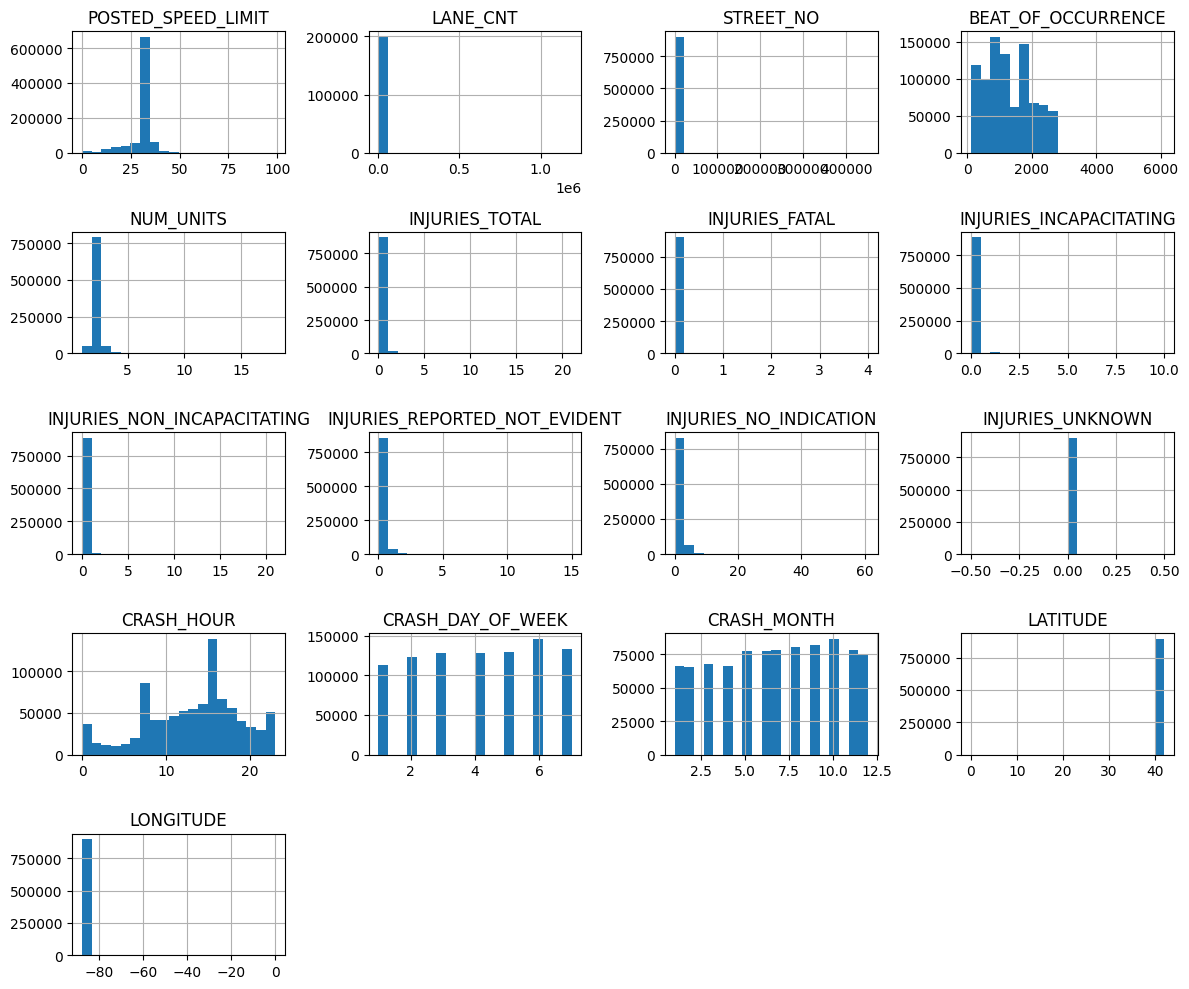

In [11]:
plot_histograms(traffic_crashes_df)

In [13]:
analyze_dates(traffic_crashes_df, 'CRASH_DATE')

Analyzing date column 'CRASH_DATE'...

Earliest CRASH_DATE: 2013-03-03 16:48:00
Latest CRASH_DATE: 2024-12-14 00:08:00



(Timestamp('2013-03-03 16:48:00'), Timestamp('2024-12-14 00:08:00'))

### 2.2.2 People Dataset

In [14]:
# Data understanding for People dataset
people_df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [15]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979859 entries, 0 to 1979858
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  EMS_AGENCY             object 
 19  EMS_RUN_NO             object 
 20  DRIVER_ACTION          object 
 21  DRIVER_VISION          object 
 22  PHYSICAL_CONDITION

In [16]:
(people_df.isna().sum()/len(people_df))*100

PERSON_ID                 0.000000
PERSON_TYPE               0.000000
CRASH_RECORD_ID           0.000000
VEHICLE_ID                2.053177
CRASH_DATE                0.000000
SEAT_NO                  79.779722
CITY                     27.234616
STATE                    26.128325
ZIPCODE                  33.053566
SEX                       1.683908
AGE                      29.113487
DRIVERS_LICENSE_STATE    41.463912
DRIVERS_LICENSE_CLASS    51.340474
SAFETY_EQUIPMENT          0.278858
AIRBAG_DEPLOYED           1.975696
EJECTION                  1.256756
INJURY_CLASSIFICATION     0.037983
HOSPITAL                 83.806675
EMS_AGENCY               90.005854
EMS_RUN_NO               98.331901
DRIVER_ACTION            20.399685
DRIVER_VISION            20.430950
PHYSICAL_CONDITION       20.344782
PEDPEDAL_ACTION          98.038042
PEDPEDAL_VISIBILITY      98.041628
PEDPEDAL_LOCATION        98.038042
BAC_RESULT               20.352510
BAC_RESULT VALUE         99.890295
CELL_PHONE_USE      

Plotting bar charts for categorical features (top 20 categories)...



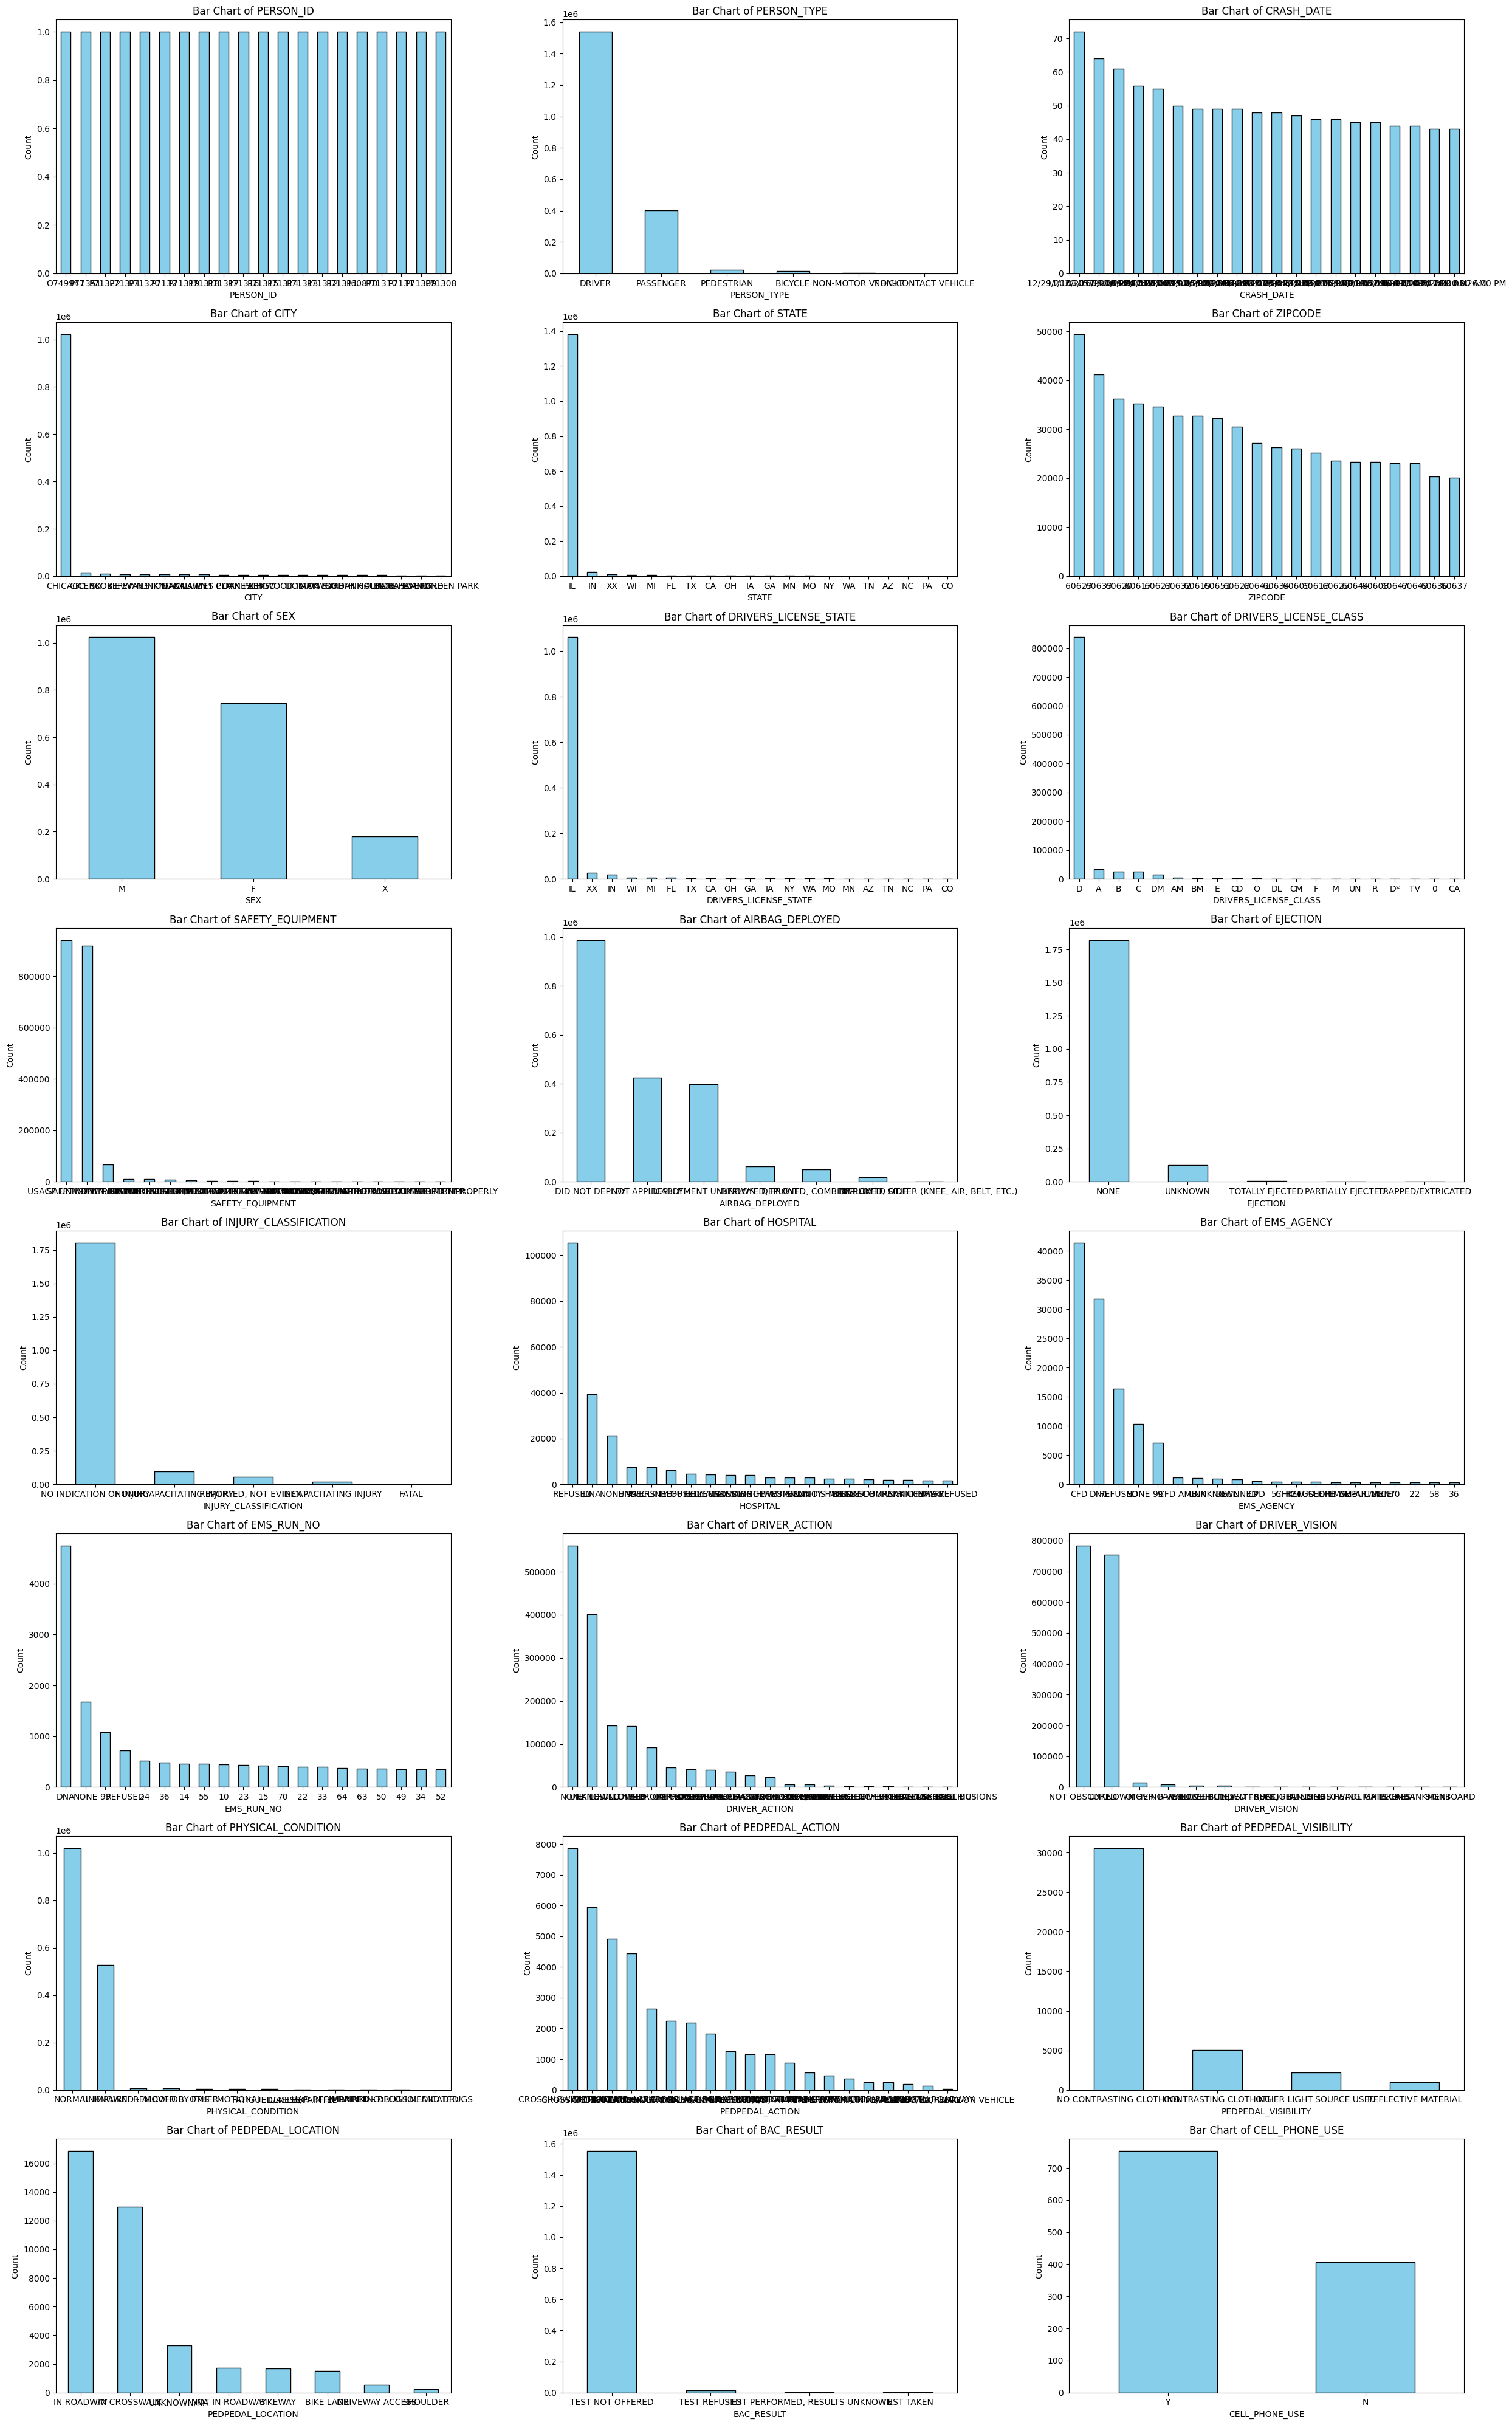

In [17]:
plot_bar_charts(people_df)

Plotting histograms for numeric features...



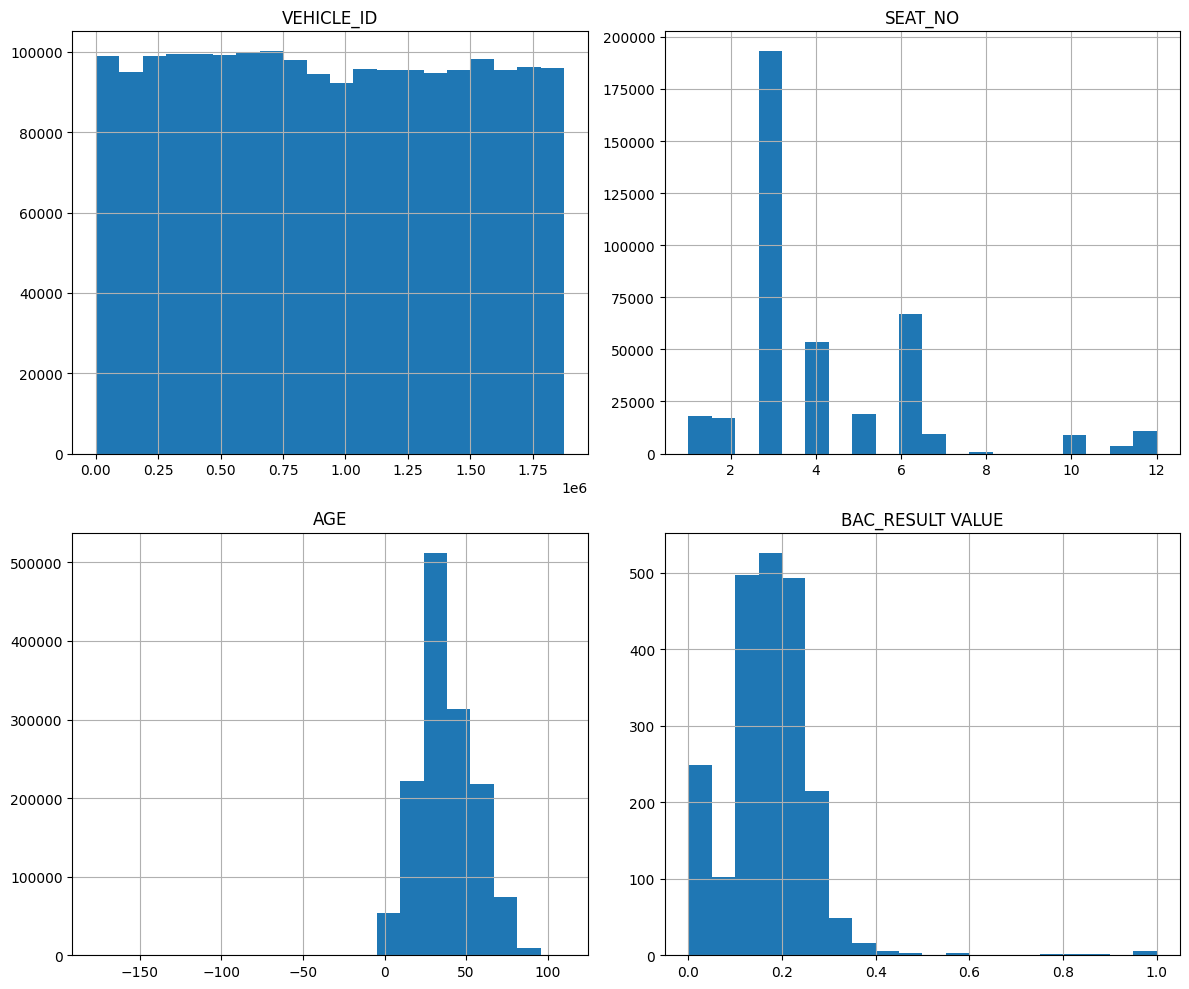

In [18]:
plot_histograms(people_df)

In [19]:
analyze_dates(people_df, 'CRASH_DATE')

Analyzing date column 'CRASH_DATE'...

Earliest CRASH_DATE: 2013-03-03 16:48:00
Latest CRASH_DATE: 2024-12-14 00:08:00



(Timestamp('2013-03-03 16:48:00'), Timestamp('2024-12-14 00:08:00'))

### 2.2.3 Vehicles Dataset

In [20]:
# Data understanding for Vehicles dataset
vehicles_df.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,NaN,1634931.0,NaN,NISSAN,SENTRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,12/06/2023 04:00:00 PM,2,DRIVER,NaN,1634978.0,NaN,CHRYSLER,SEBRING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,12/06/2023 04:30:00 PM,1,DRIVER,NaN,1634948.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,1,DRIVER,NaN,1637401.0,NaN,TOYOTA,RAV4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1720119,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,2,DRIVER,NaN,1637408.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838822 entries, 0 to 1838821
Data columns (total 71 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   CRASH_UNIT_ID             int64  
 1   CRASH_RECORD_ID           object 
 2   CRASH_DATE                object 
 3   UNIT_NO                   int64  
 4   UNIT_TYPE                 object 
 5   NUM_PASSENGERS            float64
 6   VEHICLE_ID                float64
 7   CMRC_VEH_I                object 
 8   MAKE                      object 
 9   MODEL                     object 
 10  LIC_PLATE_STATE           object 
 11  VEHICLE_YEAR              float64
 12  VEHICLE_DEFECT            object 
 13  VEHICLE_TYPE              object 
 14  VEHICLE_USE               object 
 15  TRAVEL_DIRECTION          object 
 16  MANEUVER                  object 
 17  TOWED_I                   object 
 18  FIRE_I                    object 
 19  OCCUPANT_CNT              float64
 20  EXCEED_SPEED_LIMIT_I    

In [22]:
(vehicles_df.isna().sum()/len(vehicles_df))*100

CRASH_UNIT_ID               0.000000
CRASH_RECORD_ID             0.000000
CRASH_DATE                  0.000000
UNIT_NO                     0.000000
UNIT_TYPE                   0.122578
                             ...    
CARGO_BODY_TYPE            99.201935
LOAD_TYPE                  99.237773
HAZMAT_OUT_OF_SERVICE_I    99.303141
MCS_OUT_OF_SERVICE_I       99.290470
HAZMAT_CLASS               99.936155
Length: 71, dtype: float64

In [24]:
plot_bar_charts(vehicles_df)

Plotting bar charts for categorical features (top 20 categories)...



Plotting histograms for numeric features...



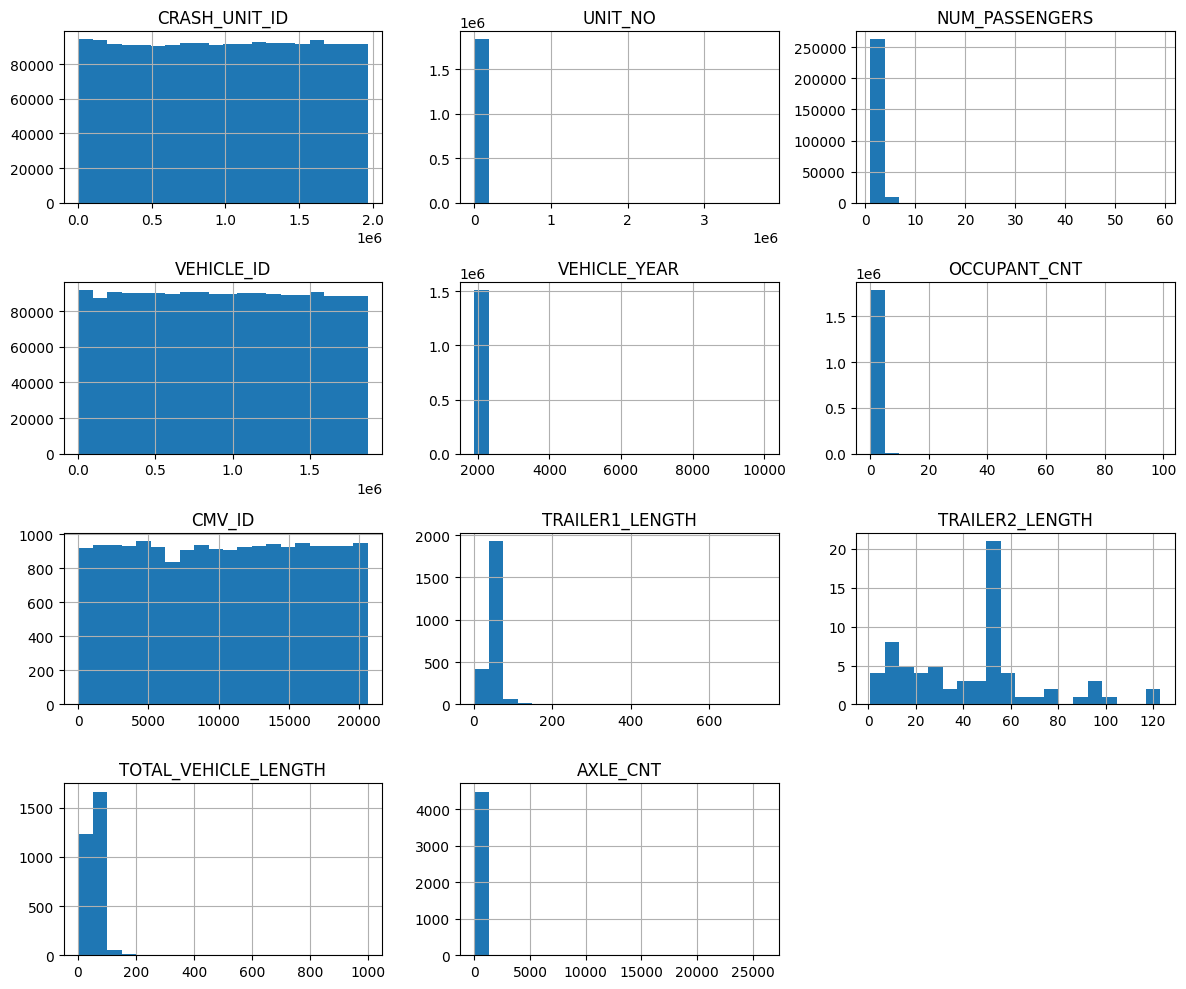

In [23]:
plot_histograms(vehicles_df)

In [25]:
analyze_dates(vehicles_df, 'CRASH_DATE')

Analyzing date column 'CRASH_DATE'...

Earliest CRASH_DATE: 2013-03-03 16:48:00
Latest CRASH_DATE: 2024-12-14 00:08:00



(Timestamp('2013-03-03 16:48:00'), Timestamp('2024-12-14 00:08:00'))

### 2.2.4 Target Class

In [26]:
injury_counts = traffic_crashes_df['MOST_SEVERE_INJURY'].value_counts()
injury_counts

NO INDICATION OF INJURY     772801
NONINCAPACITATING INJURY     71130
REPORTED, NOT EVIDENT        39463
INCAPACITATING INJURY        15074
FATAL                          985
Name: MOST_SEVERE_INJURY, dtype: int64

In [27]:
traffic_crashes_df['MOST_SEVERE_INJURY'].value_counts(normalize = True)


NO INDICATION OF INJURY     0.859190
NONINCAPACITATING INJURY    0.079081
REPORTED, NOT EVIDENT       0.043874
INCAPACITATING INJURY       0.016759
FATAL                       0.001095
Name: MOST_SEVERE_INJURY, dtype: float64

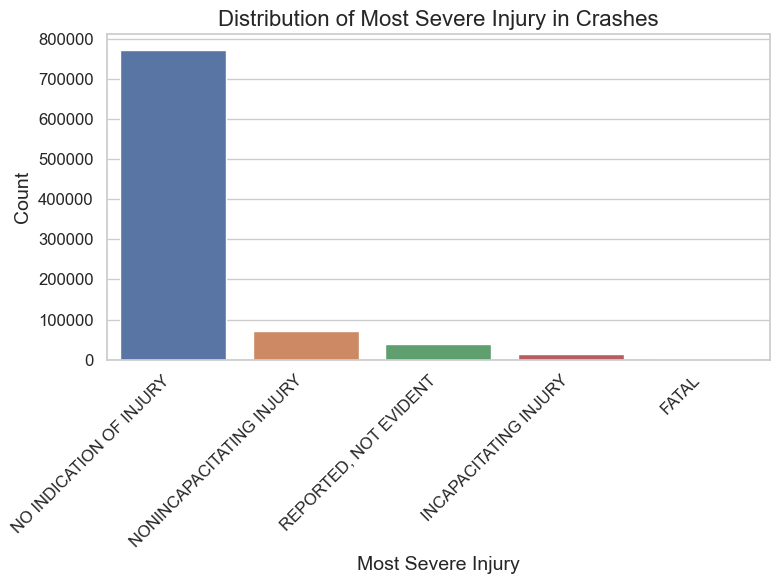

In [28]:
# Create the bar plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=injury_counts.index, y=injury_counts.values)

# Add titles and labels
plt.title('Distribution of Most Severe Injury in Crashes', fontsize=16)
plt.xlabel('Most Severe Injury', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels if needed
plt.xticks(rotation = 45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show();


## 3. <a name ="Data-Preparation"></a> Data Preparation

For streamlined reproducibility, the data cleaning process was completed in `data_cleaning_notebook.ipynb`. The final cleaned dataset, `crashes_finalized_df`, has been uploaded to Kaggle for easy access.
<br><br>
**Final Cleaned Dataframe Overview**:
   * Subset of merged data from `crashes_df`, `people_df`, and `vehicles_df`
   * ***10***% random sample
   * Sampling kept target class proportions consistent with merged dataset
   * Total of approximately ***64k*** records and ***16*** features
   * Ready for modeling -- no null values

For more detailed information on my data cleaning steps and justifications, please refer to the data_cleaning_steps.py file.

To load the final trimmed and cleaned dataset from Kaggle, use the following code.

(Please be aware that running this code will require you to enter your kaggle username and API key. The code will not proceed if you do not provide accurate information.)

To create a kaggle account, [click here](https://www.kaggle.com/account/login). 

For more details on obtaining your kaggle API key, [click here](https://github.com/Kaggle/kaggle-api/blob/main/docs/README.md).

In [29]:
# Step 1: Get Kaggle username and key from user input or environment variables
os.environ["KAGGLE_USERNAME"] = input("Enter Kaggle username: ")
os.environ["KAGGLE_KEY"] = input("Enter Kaggle key: ")

# Detect the environment (Google Colab or local machine)
if 'google.colab' in str(get_ipython()):
    # For Google Colab, use the /root/.kaggle directory
    kaggle_path = Path('/root/.kaggle')
else:
    # For local machine, use the home directory
    kaggle_path = Path.home() / '.kaggle'

# Create the .kaggle directory if it doesn't exist
os.makedirs(kaggle_path, exist_ok=True)

# Create the kaggle.json file with the correct API credentials
kaggle_json = {
    "username": os.getenv("KAGGLE_USERNAME"),
    "key": os.getenv("KAGGLE_KEY")
}

# Write the kaggle.json file in the correct location
with open(kaggle_path / 'kaggle.json', 'w') as f:
    json.dump(kaggle_json, f)

# Set file permissions to secure the API key (optional but recommended)
os.chmod(kaggle_path / 'kaggle.json', 0o600)

# Check if the credentials are set correctly (for debugging purposes)
print("Kaggle credentials are set up successfully.")

Enter Kaggle username: 
Enter Kaggle key: 
Kaggle credentials are set up successfully.


In [30]:
# Step 2: Download the dataset using Kaggle API

# Set dataset identifier and download path
dataset_identifier = 'ckucewicz/Chicago-Traffic-Data'
download_path = Path('./data')  # Local or Colab download folder

# Ensure the download path exists
os.makedirs(download_path, exist_ok=True)

# Detect the environment and run the appropriate download command
if 'google.colab' in str(get_ipython()):
    print("Downloading dataset in Google Colab...")
    !kaggle datasets download -d {dataset_identifier} --path {download_path}
else:
    print("Downloading dataset in Jupyter Notebook...")
    os.system(f"kaggle datasets download -d {dataset_identifier} --path {download_path}")

Dataset URL: https://www.kaggle.com/datasets/ckucewicz/Chicago-Traffic-Data
License(s): apache-2.0
Chicago-Traffic-Data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [31]:
# Step 3: Unzip the dataset
zip_filename = download_path / 'Chicago-Traffic-Data.zip'  # Adjust the ZIP filename
unzip_path = download_path / 'Chicago-Traffic-Data'

# Ensure the extraction path exists
os.makedirs(unzip_path, exist_ok=True)

# Unzip the dataset
try:
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(unzip_path)
    print(f"Dataset extracted to: {unzip_path}")
except FileNotFoundError:
    print(f"Error: {zip_filename} not found. Ensure the dataset was downloaded successfully.")

Dataset extracted to: data/Chicago-Traffic-Data


In [35]:
# Step 4: Load the cleaned dataset CSV into pandas DataFrame
cleaned_csv = 'crashes_finalized_df.csv'  # The name of your cleaned dataset file
cleaned_df_path = unzip_path / cleaned_csv  # Full path to the cleaned dataset

try:
    # Load CSV into pandas DataFrame
    crashes_finalized_df = pd.read_csv(cleaned_df_path)
    print("Cleaned DataFrame loaded successfully.")

except FileNotFoundError:
    print(f"Error: {cleaned_csv} not found in the extracted files.")

Cleaned DataFrame loaded successfully.


In [36]:
crashes_finalized_df.head()

,lighting_condition,first_crash_type,roadway_surface_cond,speed_limit_category,traffic_control_category,road_category,severity_category,crash_cause_category,time_of_day,day_of_week,season,sex,age_group,airbag_deployed,vehicle_category,maneuver_category
0,daylight,sideswipe opposite direction,dry,Medium,Other,multi-lane bidirectional,0,Unknown/Other,Morning,Mon,Fall,m,27-65,Not Deployed,Buses,Standard Movement
1,"darkness, lighted road",rear end,wet,Medium,Other,multi-lane bidirectional,0,Aggressive/Reckless Driving,Night (Early),Wed,Fall,m,27-65,Not Deployed,Passenger Vehicles,Standard Movement
2,"darkness, lighted road",other object,dry,Medium,Other,unknown,0,Distraction,Night (Early),Wed,Summer,m,16-26,Not Deployed,Passenger Vehicles,Standard Movement
3,daylight,sideswipe same direction,dry,Medium,Signal,unknown,0,Unknown/Other,Afternoon,Mon,Summer,m,16-26,Not Deployed,Passenger Vehicles,Standard Movement
4,"darkness, lighted road",parked motor vehicle,dry,Medium,Other,multi-lane bidirectional,0,Unknown/Other,Night (Early),Sat,Summer,f,65+,Not Deployed,Motorcycles,Reversing/Stopping


In [37]:
crashes_finalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63946 entries, 0 to 63945
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   lighting_condition        63946 non-null  object
 1   first_crash_type          63946 non-null  object
 2   roadway_surface_cond      63946 non-null  object
 3   speed_limit_category      63946 non-null  object
 4   traffic_control_category  63946 non-null  object
 5   road_category             63946 non-null  object
 6   severity_category         63946 non-null  int64 
 7   crash_cause_category      63946 non-null  object
 8   time_of_day               63946 non-null  object
 9   day_of_week               63946 non-null  object
 10  season                    63946 non-null  object
 11  sex                       63946 non-null  object
 12  age_group                 63946 non-null  object
 13  airbag_deployed           63946 non-null  object
 14  vehicle_category      

In [38]:
# Select all columns except the target column
columns_to_convert = [col for col in crashes_finalized_df.columns if col != 'severity_category']

# Convert the selected columns to category type
crashes_finalized_df[columns_to_convert] = crashes_finalized_df[columns_to_convert].apply(lambda x: x.astype('category'))

# Optionally, check the types
print(crashes_finalized_df.dtypes)

lighting_condition          category
first_crash_type            category
roadway_surface_cond        category
speed_limit_category        category
traffic_control_category    category
road_category               category
severity_category              int64
crash_cause_category        category
time_of_day                 category
day_of_week                 category
season                      category
sex                         category
age_group                   category
airbag_deployed             category
vehicle_category            category
maneuver_category           category
dtype: object


In [39]:
crashes_finalized_df.isna().sum()

lighting_condition          0
first_crash_type            0
roadway_surface_cond        0
speed_limit_category        0
traffic_control_category    0
road_category               0
severity_category           0
crash_cause_category        0
time_of_day                 0
day_of_week                 0
season                      0
sex                         0
age_group                   0
airbag_deployed             0
vehicle_category            0
maneuver_category           0
dtype: int64

## 4. <a name ="Exploratory-Data-Analysis"></a>Exploratory Data Analysis (EDA)

## 5. <a name ="Modeling"></a>  Modeling

## 6. <a name ="Evaluation"></a> Evaluation

## 7. <a name ="Conclusion"></a> Conclusion

### 7.1 <a name ="Limitations"></a> Limitations

This raises a crucial question: How do we get drivers to slow down? The answer lies in addressing behavior change—a much more complex challenge. Several strategies have been implemented to reduce speed, from speed cushions to lower speed limits, narrower lanes, and increased police presence in high-speed areas, though debates continue over the most effective approaches.

### 7.2 <a name ="Recommendations"></a> Recommendations

### 7.3 <a name ="Next-Steps"></a> Next Steps

## 8. <a name ="References"></a> References 

1. City of Philadelphia. (2024). *Vision Zero Annual Report 2024*. Philadelphia.gov. https://visionzerophl.com/plans-and-reports/annual-report-2024/


2. Chicago Department of Transportation (CDOT). (2024). *Chicago Annual Traffic Report 2024*. City of Chicago. https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B60FB7292-0000-CB1B-AC4D-334F5F94606B%7D


3. Vision Zero Network. (2024). *What is Vision Zero?* Vision Zero Network. https://visionzeronetwork.org/about/what-is-vision-zero/


4. Vision Zero Philadelphia. (n.d.). *Get involved*. Vision Zero Philadelphia. https://visionzerophl.com/get-involved/


5. Illinois Department of Transportation. (2024). *Illinois fatal crash data: 2024 snapshot*. Illinois Department of Transportation. https://apps.dot.illinois.gov/FatalCrash/snapshot.html


6. City of Chicago. (2017). *Vision Zero Action Plan 2017-2019*. City of Chicago. https://api.chicago.gov/filenet5/servlets/getDocumentContent?applicationId=CompleteStreets&documentId=%7B0031C690-0000-C016-92E9-31618D7320B1%7D